In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import numpy as np
import pandas as pd

In [2]:
clickBait = pd.read_csv('/content/drive/MyDrive/DataCollection/clickbait.csv', error_bad_lines=False)
notClickBait = pd.read_csv('/content/drive/MyDrive/DataCollection/notClickbait.csv', error_bad_lines=False)

clickBait["isClickBait"] = 1
notClickBait["isClickBait"] = 0

titles = pd.concat([clickBait[["isClickBait","Video Title"]], notClickBait[["isClickBait", "Video Title"]]])
titles = titles.sample(frac=1, random_state=42)
titles.head()

,isClickBait,Video Title
95,1,SHE IS PREGNANT!!
15,1,BRENT AND I PRANK OUR MOM!!
30,1,kid shoots dad after he takes PS5..
57,0,DaBaby - Wockesha (Freestyle) [Official Video]
27,0,Qualifying Highlights 2021 Dutch Grand Prix


In [3]:
train = titles[:175]
valid = titles[175:190]
test = titles[190:]

X_train = train["Video Title"]
y_train = train["isClickBait"]
X_valid = valid["Video Title"]
y_valid = valid["isClickBait"]
X_test = test["Video Title"]
y_test = test["isClickBait"]

In [4]:
embedding = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [5]:
model = tf.keras.Sequential([
                             hub_layer, #splits sentence into tokens, embeds each token, and combines the embeddings
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense (Dense)                (None, 16)                8208      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 256,806,049
Trainable params: 256,806,049
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer="nadam", loss= tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
6/6 [==============================] - 26s 2s/step - loss: 0.6781 - accuracy: 0.4800 - val_loss: 0.6530 - val_accuracy: 0.5455
Epoch 2/20
6/6 [==============================] - 9s 2s/step - loss: 0.6060 - accuracy: 0.5086 - val_loss: 0.6116 - val_accuracy: 0.5455
Epoch 3/20
6/6 [==============================] - 10s 2s/step - loss: 0.5014 - accuracy: 0.7314 - val_loss: 0.5273 - val_accuracy: 0.6364
Epoch 4/20
6/6 [==============================] - 9s 2s/step - loss: 0.3980 - accuracy: 0.8571 - val_loss: 0.4647 - val_accuracy: 0.8182
Epoch 5/20
6/6 [==============================] - 9s 2s/step - loss: 0.2929 - accuracy: 0.9200 - val_loss: 0.5050 - val_accuracy: 0.6364
Epoch 6/20
6/6 [==============================] - 9s 2s/step - loss: 0.2390 - accuracy: 0.9314 - val_loss: 0.3463 - val_accuracy: 0.9091
Epoch 7/20
6/6 [==============================] - 9s 2s/step - loss: 0.1569 - accuracy: 0.9771 - val_loss: 0.2913 - val_accuracy: 0.9091
Epoch 8/20
6/6 [=======================

In [7]:
results = model.evaluate(X_test, y_test, verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

1/1 - 0s - loss: 0.2690 - accuracy: 0.9091
loss: 0.269
accuracy: 0.909


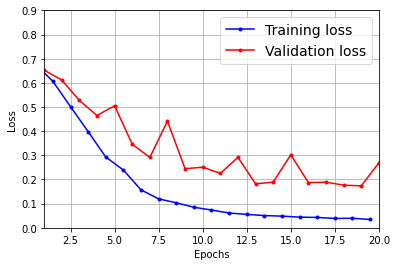

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.axis([1, 20, 0, 0.9]) #Tweak these axis params to adjust the view!!!
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [9]:
model.save('title_classifier.sav')

INFO:tensorflow:Assets written to: title_classifier.sav/assets


INFO:tensorflow:Assets written to: title_classifier.sav/assets


In [11]:
!zip -r /content/title_classifier.zip /content/title_classifier/

  adding: content/title_classifier/ (stored 0%)
  adding: content/title_classifier/saved_model.pb (deflated 69%)
  adding: content/title_classifier/assets/ (stored 0%)
  adding: content/title_classifier/variables/ (stored 0%)
  adding: content/title_classifier/variables/variables.data-00000-of-00001 (deflated 69%)
  adding: content/title_classifier/variables/variables.index (deflated 83%)
  adding: content/title_classifier/keras_metadata.pb (deflated 84%)


In [12]:
from google.colab import files
files.download("/content/title_classifier.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>